In [10]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.utils import np_utils
import os
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
width_shape = 224
height_shape = 224
num_classes = 8
epochs = 50
batch_size = 32

In [13]:
train_data_dir = 'C:/Users/carlo/Desktop/proyecto de carne/data/entrenamiento'  
validation_data_dir = 'C:/Users/carlo/Desktop/proyecto de carne/data/validacion'


In [14]:
train_datagen = ImageDataGenerator(  
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)

valid_datagen = ImageDataGenerator(    
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    preprocessing_function=preprocess_input)
train_generator = train_datagen.flow_from_directory(  
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(  
    validation_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    #save_to_dir='',
    class_mode='categorical')


Found 1633 images belonging to 8 classes.
Found 810 images belonging to 8 classes.


In [15]:
nb_train_samples = 1490
nb_validation_samples = 50

In [16]:
from keras.applications.mobilenet import MobileNet


image_input = Input(shape=(width_shape, height_shape, 3))

m_MobileNet = MobileNet(input_tensor=image_input, include_top=False,weights='imagenet')


m_MobileNet.summary()

last_layer = m_MobileNet.layers[-1].output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x=Dropout(0.3)(x)
x = Dense(128, activation='relu', name='fc2')(x)
x=Dropout(0.3)(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_model = Model(image_input, out)
custom_model.summary()




custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

17235968/17225924 [==============================] - 3s 0us/step
Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32

 conv_dw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)   

 conv_dw_2_relu (ReLU)       (None, 56, 56, 64)        0         
                                                                 
 conv_pw_2 (Conv2D)          (None, 56, 56, 128)       8192      
                                                                 
 conv_pw_2_bn (BatchNormaliz  (None, 56, 56, 128)      512       
 ation)                                                          
                                                                 
 conv_pw_2_relu (ReLU)       (None, 56, 56, 128)       0         
                                                                 
 conv_dw_3 (DepthwiseConv2D)  (None, 56, 56, 128)      1152      
                                                                 
 conv_dw_3_bn (BatchNormaliz  (None, 56, 56, 128)      512       
 ation)                                                          
                                                                 
 conv_dw_3_relu (ReLU)       (None, 56, 56, 128)       0         
          

                                                                 
 conv_dw_11 (DepthwiseConv2D  (None, 14, 14, 512)      4608      
 )                                                               
                                                                 
 conv_dw_11_bn (BatchNormali  (None, 14, 14, 512)      2048      
 zation)                                                         
                                                                 
 conv_dw_11_relu (ReLU)      (None, 14, 14, 512)       0         
                                                                 
 conv_pw_11 (Conv2D)         (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_11_bn (BatchNormali  (None, 14, 14, 512)      2048      
 zation)                                                         
                                                                 
 conv_pw_11_relu (ReLU)      (None, 14, 14, 512)       0         
          

In [17]:
model_history = custom_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

C:\ProgramData\anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
46/46 [==============================] - ETA: 0s - loss: 3.0610 - accuracy: 0.2047WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001C00A718708> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

46/46 [==============================] - 156s 3s/step - loss: 0.8786 - accuracy: 0.7052 - val_loss: 0.8464 - val_accuracy: 0.7500
Epoch 46/50
46/46 [==============================] - 153s 3s/step - loss: 0.9156 - accuracy: 0.6960 - val_loss: 0.7052 - val_accuracy: 0.8125
Epoch 47/50
46/46 [==============================] - 168s 4s/step - loss: 0.8869 - accuracy: 0.7078 - val_loss: 0.4477 - val_accuracy: 0.8438
Epoch 48/50
46/46 [==============================] - 177s 4s/step - loss: 0.8694 - accuracy: 0.7147 - val_loss: 1.0082 - val_accuracy: 0.6562
Epoch 49/50
46/46 [==============================] - 163s 4s/step - loss: 0.8666 - accuracy: 0.7030 - val_loss: 0.6112 - val_accuracy: 0.8438
Epoch 50/50
46/46 [==============================] - 201s 4s/step - loss: 0.8259 - accuracy: 0.7210 - val_loss: 0.5448 - val_accuracy: 0.8125


In [18]:
custom_model.save("model_Mobilenet.h5")

In [19]:
def plotTraining(hist, epochs, typeData):
    
    if typeData=="loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'-r',label='Loss Training')
    if typeData=="accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'-r',label='Accuracy Training')
    if typeData=="val_loss":
        plt.figure(1,figsize=(10,5))
        yc=hist.history['val_loss']
        xc=range(epochs)
        plt.ylabel('Loss', fontsize=24)
        plt.plot(xc,yc,'--b',label='Loss Validate')
    if typeData=="val_accuracy":
        plt.figure(2,figsize=(10,5))
        yc=hist.history['val_accuracy']
        for i in range(0, len(yc)):
            yc[i]=100*yc[i]
        xc=range(epochs)
        plt.ylabel('Accuracy (%)', fontsize=24)
        plt.plot(xc,yc,'--b',label='Training Validate')
        

    plt.rc('xtick',labelsize=24)
    plt.rc('ytick',labelsize=24)
    plt.rc('legend', fontsize=18) 
    plt.legend()
    plt.xlabel('Number of Epochs',fontsize=24)
    plt.grid(True)

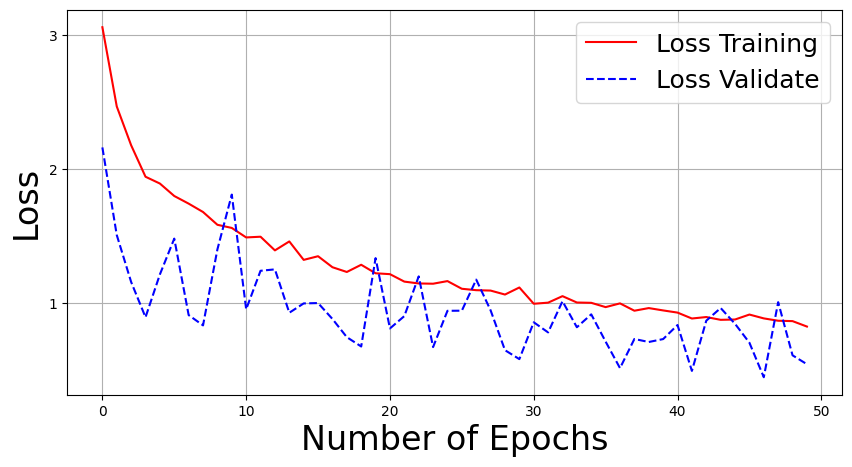

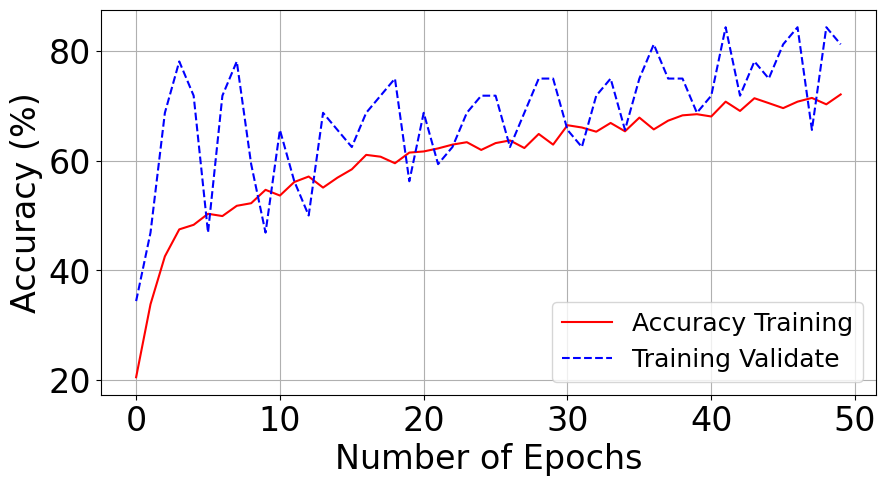

In [20]:
plotTraining(model_history,epochs,"loss")
plotTraining(model_history,epochs,"accuracy")
plotTraining(model_history,epochs,"val_loss")
plotTraining(model_history,epochs,"val_accuracy")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
CLASS_03


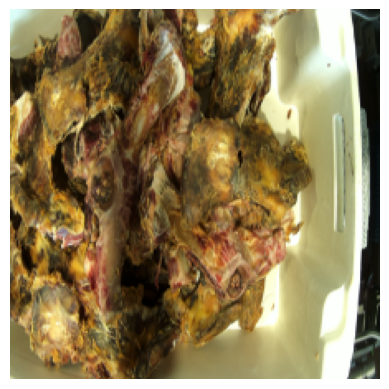

In [24]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model

names = ['CLASS_01','CLASS_02','CLASS_03','CLASS_04','CLASS_05',
         'CLASS_06','CLASS_07','CLASS_08']

modelt = load_model("model_Mobilenet.h5")
#modelt = custom_model

imaget_path = "C:/Users/carlo/Desktop/proyecto de carne/data/validacion/CLASS_07/11-CAPTURE_20220425_115402_242.png"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [26]:
pip install mlxtend


     ---------------------------------------- 1.4/1.4 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 10.0/10.0 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 502.5/502.5 kB 2.1 MB/s eta 0:00:00


Found 810 images belonging to 8 classes.


C:\ProgramData\anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:27: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


C:\ProgramData\anaconda3\envs\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\envs\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\envs\python\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.3810    0.1667    0.2319        48
           2     0.2941    0.8763    0.4404        97
           3     0.1905    0.0889    0.1212        45
           4     0.9339    0.7691    0.8435       459
           5     0.6087    0.7368    0.6667        19
           6     0.6806    0.4298    0.5269       114
           7     0.1667    0.0370    0.0606        27

    accuracy                         0.6346       810
   macro avg     0.4069    0.3881    0.3614       810
weighted avg     0.7132    0.6346    0.6430       810



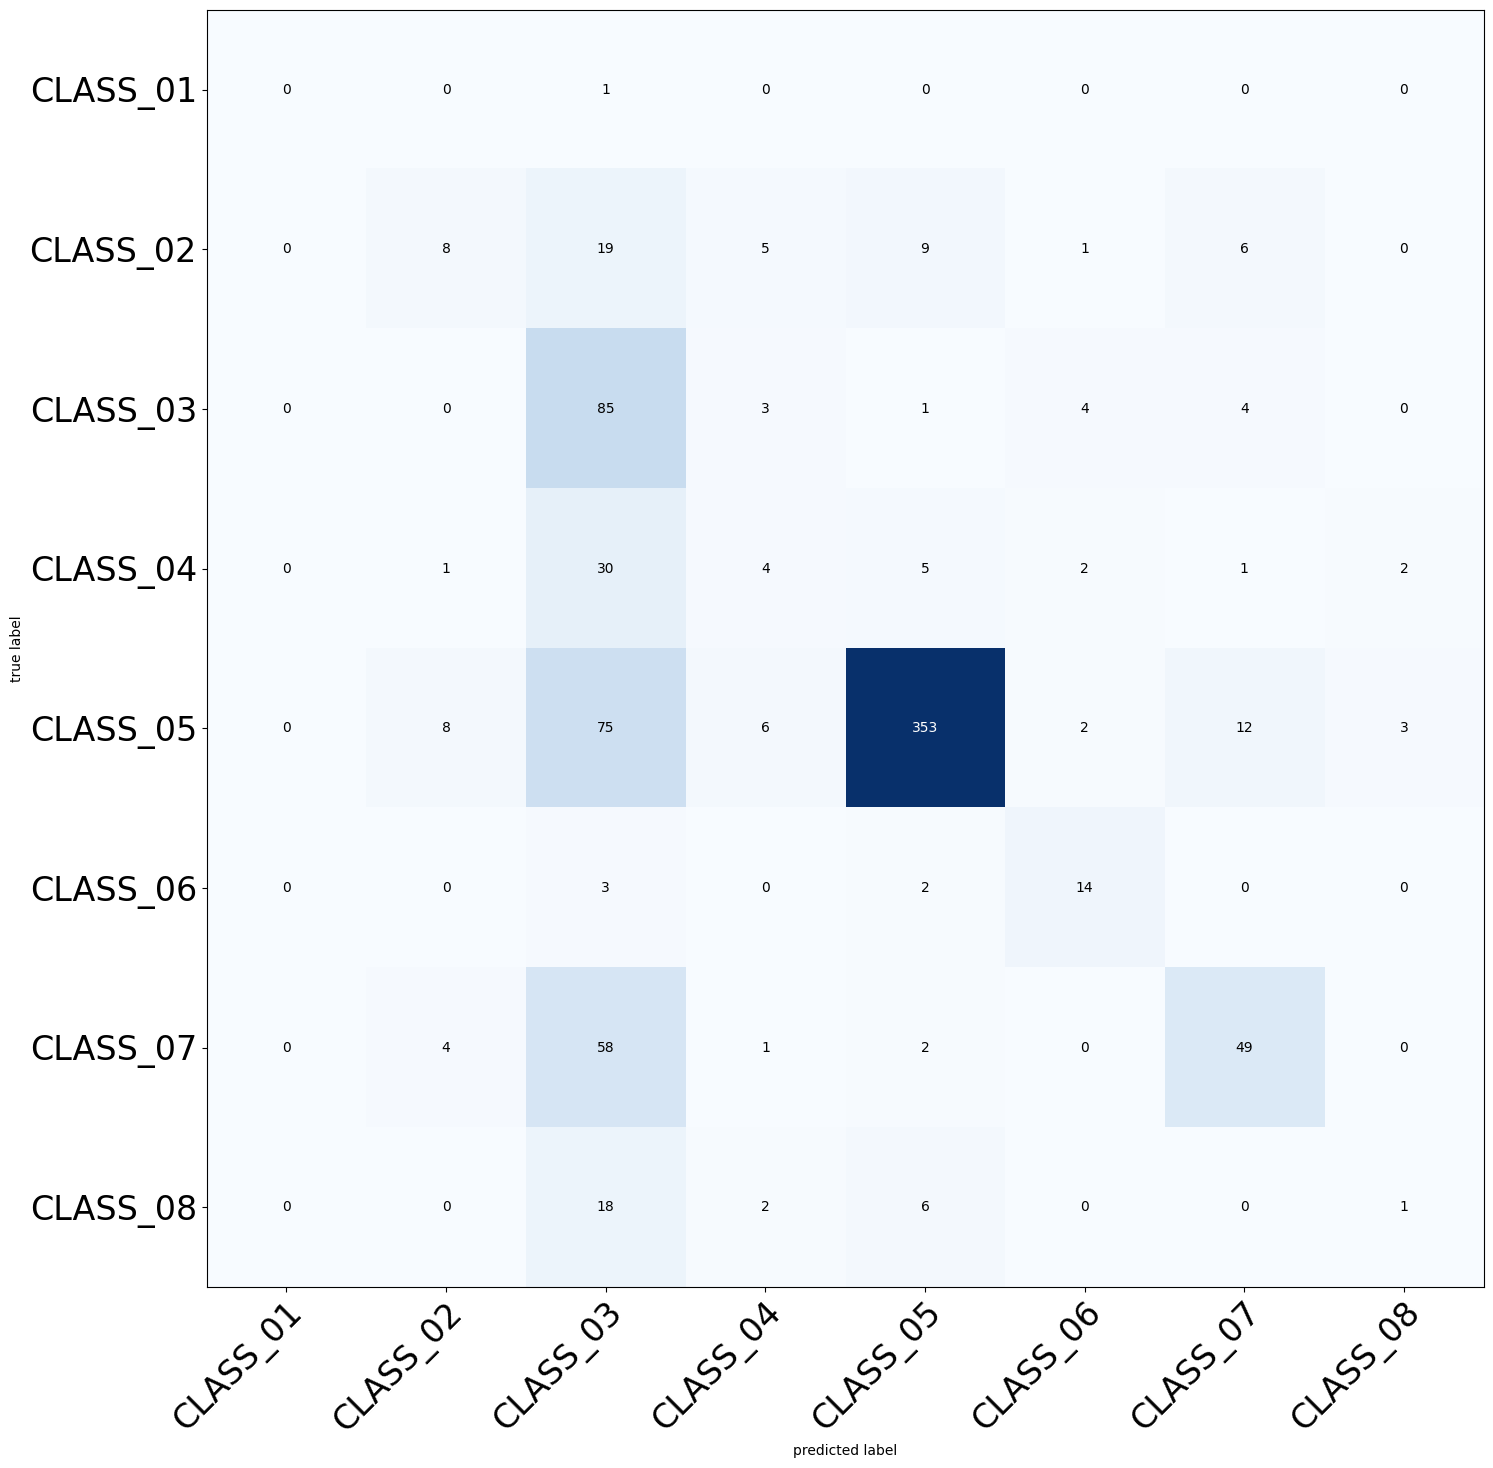

In [27]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


names = ['CLASS_01','CLASS_02','CLASS_03','CLASS_04','CLASS_05',
         'CLASS_06','CLASS_07','CLASS_08']

test_data_dir = 'C:/Users/carlo/Desktop/proyecto de carne/data/validacion'  

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("model_Mobilenet.h5")
#modelt = custom_model

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(15,15), class_names = names, show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))

In [28]:
from keras.applications.vgg19 import VGG19


image_input = Input(shape=(width_shape, height_shape, 3))

m_VGG19 = VGG19(input_tensor=image_input, include_top=False,weights='imagenet')

m_VGG19.summary()

last_layer = m_VGG19.layers[-1].output
x= Flatten(name='flatten')(last_layer)
x = Dense(128, activation='relu', name='fc1')(x)
x=Dropout(0.3)(x)
x = Dense(128, activation='relu', name='fc2')(x)
x=Dropout(0.3)(x)
out = Dense(num_classes, activation='softmax', name='output')(x)
custom_model = Model(image_input, out)
custom_model.summary()

# freeze all the layers except the dense layers
for layer in custom_model.layers[:-6]:
	layer.trainable = False

custom_model.summary()

custom_model.compile(loss='categorical_crossentropy',optimizer='adadelta',metrics=['accuracy'])

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       295168    
                                                                 
 block3_conv2 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_conv3 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_conv4 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_pool (MaxPooling2D)  (None, 28, 28, 256)       0         
                                                                 
 block4_co

In [29]:
model_history = custom_model.fit_generator(  
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_steps=nb_validation_samples//batch_size)

C:\ProgramData\anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
46/46 [==============================] - ETA: 0s - loss: 16.1019 - accuracy: 0.1207WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001C038B4E4C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`)

46/46 [==============================] - 231s 5s/step - loss: 3.4305 - accuracy: 0.5031 - val_loss: 1.5971 - val_accuracy: 0.6562
Epoch 46/50
46/46 [==============================] - 245s 5s/step - loss: 3.4017 - accuracy: 0.5364 - val_loss: 1.3946 - val_accuracy: 0.6875
Epoch 47/50
46/46 [==============================] - 247s 5s/step - loss: 3.3682 - accuracy: 0.5239 - val_loss: 1.3423 - val_accuracy: 0.6875
Epoch 48/50
46/46 [==============================] - 280s 6s/step - loss: 3.1984 - accuracy: 0.5441 - val_loss: 2.0188 - val_accuracy: 0.5312
Epoch 49/50
46/46 [==============================] - 250s 5s/step - loss: 3.4052 - accuracy: 0.5260 - val_loss: 2.0015 - val_accuracy: 0.6875
Epoch 50/50
46/46 [==============================] - 233s 5s/step - loss: 3.2184 - accuracy: 0.5531 - val_loss: 1.9418 - val_accuracy: 0.6562


In [30]:
custom_model.save("model_VGG19.h5")

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
CLASS_05


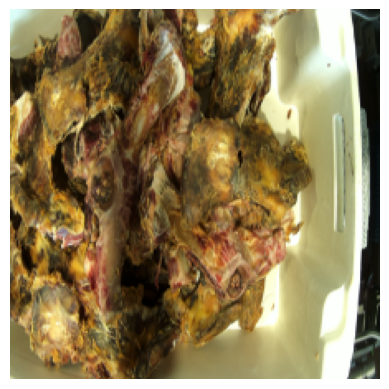

In [32]:
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.models import load_model

names = ['CLASS_01','CLASS_02','CLASS_03','CLASS_04','CLASS_05',
         'CLASS_06','CLASS_07','CLASS_08']

modelt = load_model("model_VGG19.h5")
#modelt = custom_model

imaget_path = "C:/Users/carlo/Desktop/proyecto de carne/data/validacion/CLASS_07/11-CAPTURE_20220425_115402_242.png"
imaget=cv2.resize(cv2.imread(imaget_path), (width_shape, height_shape), interpolation = cv2.INTER_AREA)
xt = np.asarray(imaget)
xt=preprocess_input(xt)
xt = np.expand_dims(xt,axis=0)
preds = modelt.predict(xt)

print(names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(imaget),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found 810 images belonging to 8 classes.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


C:\ProgramData\anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:27: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         1
           1     0.2143    0.0625    0.0968        48
           2     0.2373    0.1443    0.1795        97
           3     0.0833    0.0444    0.0580        45
           4     0.8376    0.5730    0.6805       459
           5     0.0000    0.0000    0.0000        19
           6     0.2315    0.6579    0.3425       114
           7     0.0000    0.0000    0.0000        27

    accuracy                         0.4407       810
   macro avg     0.2005    0.1853    0.1696       810
weighted avg     0.5530    0.4407    0.4642       810



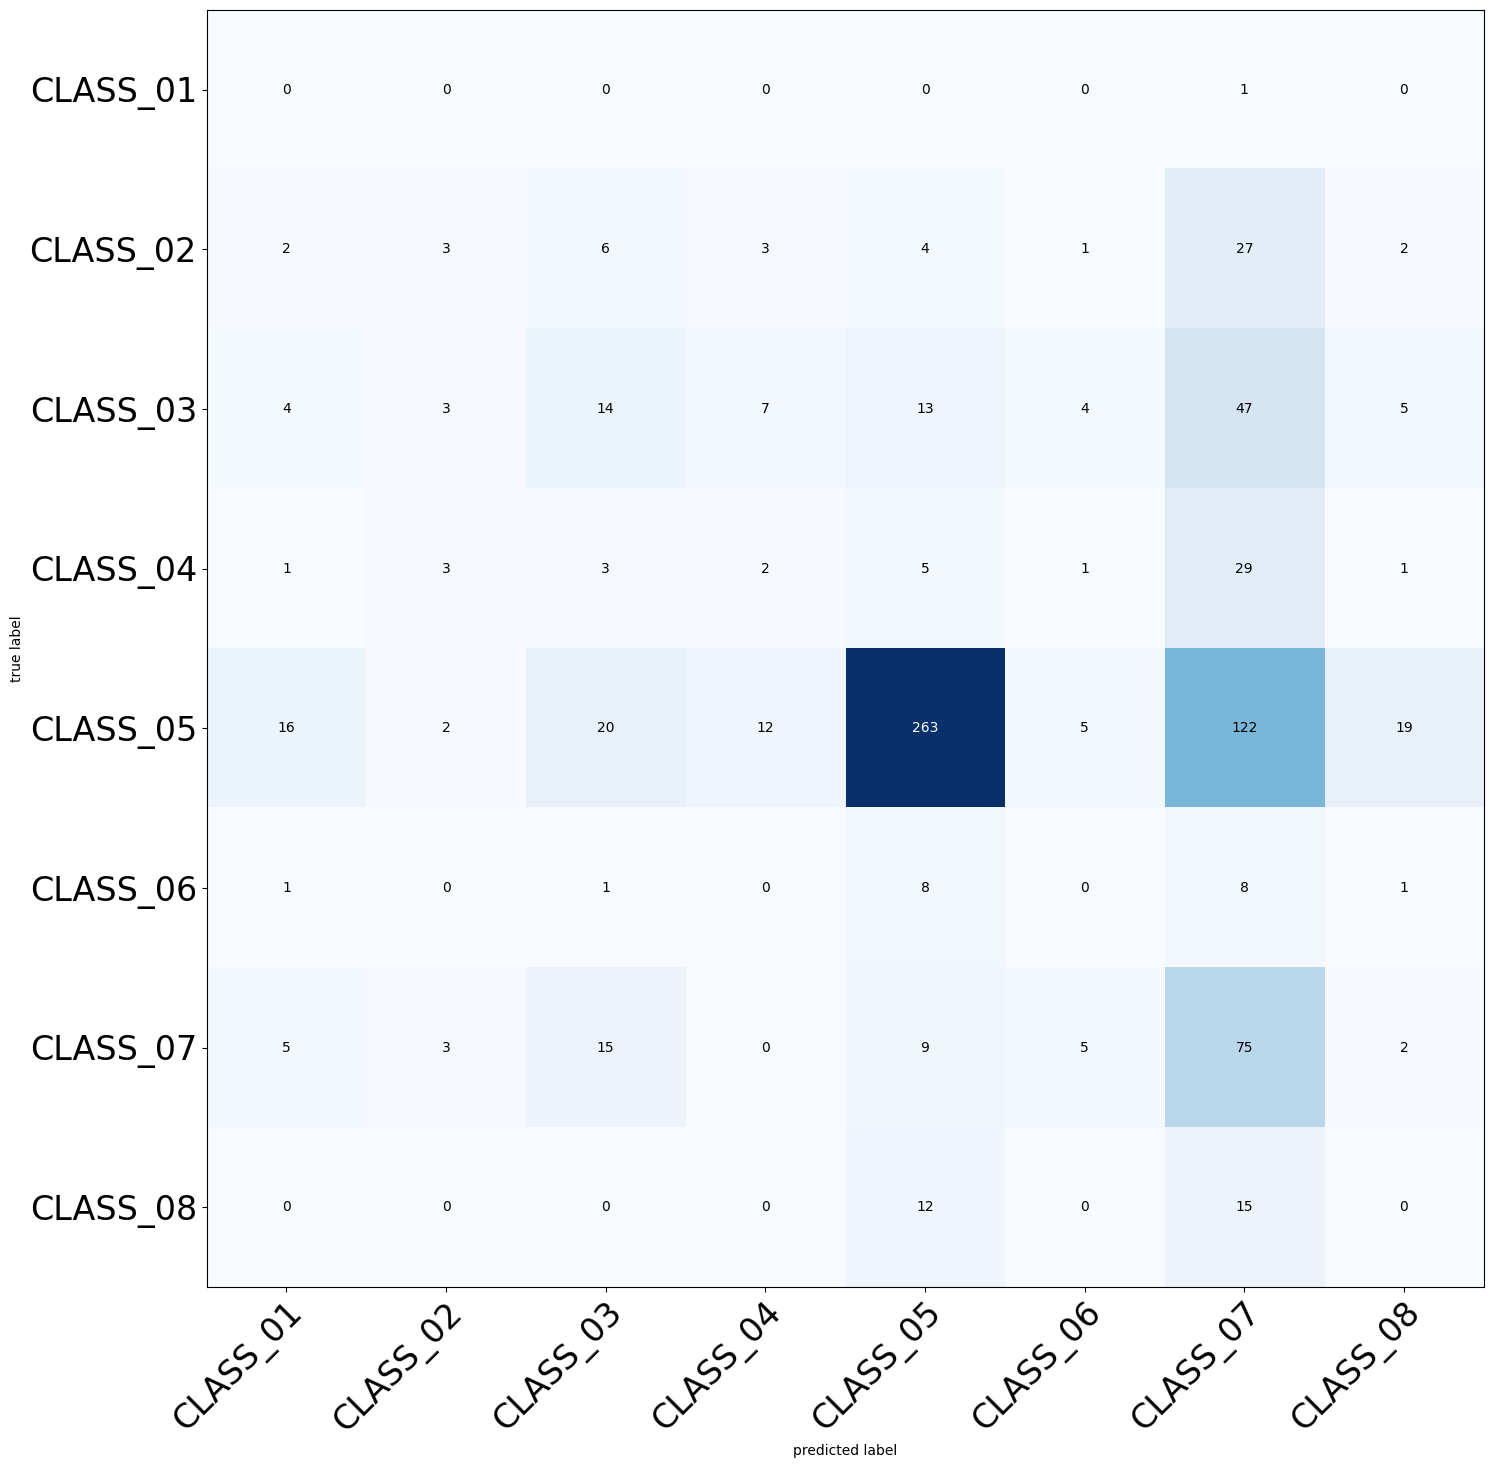

In [33]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


names = ['CLASS_01','CLASS_02','CLASS_03','CLASS_04','CLASS_05',
         'CLASS_06','CLASS_07','CLASS_08']

test_data_dir = 'C:/Users/carlo/Desktop/proyecto de carne/data/validacion'  

test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(width_shape, height_shape), 
    batch_size = batch_size,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("model_VGG19.h5")
#modelt = custom_model

predictions = custom_Model.predict_generator(generator=test_generator)

y_pred = np.argmax(predictions, axis=1)
y_real = test_generator.classes


matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(15,15), class_names = names, show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))